# Modeling - selection of the best models with grid search optimization

#### Importing necessary libraries:

In [1]:
import functions
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
import warnings
from sklearn.exceptions import UndefinedMetricWarning, ConvergenceWarning
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.simplefilter('ignore', FutureWarning)

#### Loading sets:

In [2]:
data_scaled = pd.read_csv(r'./data/data_scaled.csv', delimiter = ';')

#### Split dataset into train and test subsets:

In [3]:
y = data_scaled['y']
X_scaled = data_scaled.drop(['y'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 100, stratify = y)

# Examinig baseline models with grid search optimization

In [4]:
results_wgs = {}

##### LogisticRegression (with grid search):

Classification Report X_test:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7308
           1       0.35      0.61      0.45       928

    accuracy                           0.83      8236
   macro avg       0.65      0.73      0.67      8236
weighted avg       0.88      0.83      0.85      8236

Confusion Matrix:
AUC: 0.58
LogisticRegression(C=10, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


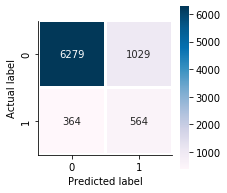

In [5]:
model_to_gs = LogisticRegression(solver='liblinear', class_weight='balanced')
params = {
    "C":[0.001, 0.01, 0.1, 1, 10, 100],
    "penalty":["l1","l2"],
}
gscv = GridSearchCV(param_grid=params, estimator=model_to_gs, cv = 3, n_jobs = 8)
gscv.fit(X_train, y_train)
means = gscv.cv_results_
best_model = gscv.best_estimator_
model_LR_wgs = functions.vis_results(best_model, X_train, X_test, y_train, y_test)
results_wgs.update(dict(functions.model_result(model_LR_wgs)))

##### Decision Tree Classifier (with grid search):

Classification Report X_test:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7308
           1       0.45      0.48      0.47       928

    accuracy                           0.88      8236
   macro avg       0.69      0.70      0.70      8236
weighted avg       0.88      0.88      0.88      8236

Confusion Matrix:
AUC: 0.41
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


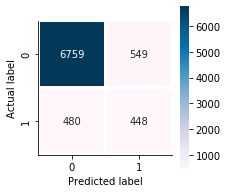

In [6]:
model_to_gs = DecisionTreeClassifier(class_weight='balanced')
params = {
    "criterion": ["gini","entropy"],
    "min_samples_leaf": [1, 5, 10, 15, 25, 50],  
    "max_depth": [1, 5, 10 , 15, 20, 25],
}
gscv = GridSearchCV(param_grid=params, estimator=model_to_gs, cv = 3, n_jobs = 8)
gscv.fit(X_train, y_train)
best_model = gscv.best_estimator_
model_DTC_wgs = functions.vis_results(best_model, X_train, X_test, y_train, y_test)
results_wgs.update(dict(functions.model_result(model_DTC_wgs)))

##### Random Forest Classifier (with grid search):

Classification Report X_test:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7308
           1       0.54      0.30      0.38       928

    accuracy                           0.89      8236
   macro avg       0.73      0.63      0.66      8236
weighted avg       0.87      0.89      0.88      8236

Confusion Matrix:
AUC: 0.52
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


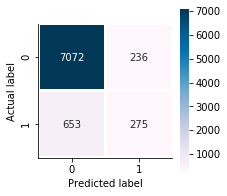

In [7]:
model_to_gs = RandomForestClassifier(class_weight='balanced')
params = {
    "criterion": ["gini","entropy"],
    "min_samples_leaf": [1, 5, 10, 15, 25, 50],
    "max_depth": [1, 5 , 10 , 15, 20, 25],
}
gscv = GridSearchCV(param_grid=params, estimator=model_to_gs, cv = 3, n_jobs = 8)
gscv.fit(X_train, y_train)
best_model = gscv.best_estimator_
model_RFC_wgs = functions.vis_results(best_model, X_train, X_test, y_train, y_test)
results_wgs.update(dict(functions.model_result(model_RFC_wgs)))

##### SVM (with grid search):

Classification Report X_test:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7308
           1       0.38      0.59      0.46       928

    accuracy                           0.84      8236
   macro avg       0.66      0.74      0.69      8236
weighted avg       0.88      0.84      0.86      8236

Confusion Matrix:
AUC: 0.53
SVC(C=0.5, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


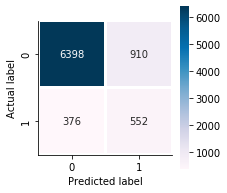

In [8]:
model_to_gs = SVC(probability=True, class_weight='balanced')
params = {
    "kernel":['linear', 'rbf'],
    "C": [0.1, 0.5, 1]
         }
gscv = GridSearchCV(param_grid = params, estimator = model_to_gs, cv = 3, n_jobs = 8)
gscv.fit(X_train, y_train)
best_model = gscv.best_estimator_
model_SVM_wgs = functions.vis_results(best_model, X_train, X_test, y_train, y_test)
results_wgs.update(dict(functions.model_result(model_SVM_wgs)))

##### XGB Classifier (with grid search):

Classification Report X_test:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7308
           1       0.36      0.63      0.46       928

    accuracy                           0.83      8236
   macro avg       0.66      0.75      0.68      8236
weighted avg       0.88      0.83      0.85      8236

Confusion Matrix:
AUC: 0.59
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=15, missing=None, n_estimator=1,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=7.876050873032981, seed=None,
              silent=None, subsample=1, verbosity=1)


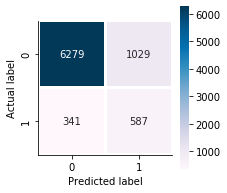

In [9]:
scale_pos_weight = np.sum(y == 0)/ float(np.sum(y == 1))
model_to_gs = XGBClassifier(scale_pos_weight = scale_pos_weight)
params = {
    "n_estimator": [1, 5, 10, 15, 20, 25],
    "learning_rate": [0.1, 0.2, 0.3, 0.4],
    "min_child_weight": [5, 10, 15, 20],
}
gscv = GridSearchCV(param_grid=params, estimator=model_to_gs, cv = 3, n_jobs = 8)
gscv.fit(X_train, y_train)
best_model = gscv.best_estimator_
model_XGB_wgs = functions.vis_results(best_model, X_train, X_test, y_train, y_test)
results_wgs.update(dict(functions.model_result(model_XGB_wgs)))

### Results:

In [10]:
results_wgs = pd.DataFrame(data=results_wgs).T
results_wgs.reset_index(inplace=True)
results_wgs.columns = ['Model', 'ACC', 'AUC', 'PRECISION_ALL', 'RECALL_ALL', 'F1_ALL', 'PRECISION_1', 'RECALL_1', 'F1_1']
results_wgs

,Model,ACC,AUC,PRECISION_ALL,RECALL_ALL,F1_ALL,PRECISION_1,RECALL_1,F1_1
0,LogisticRegression,0.830864,0.581788,0.878596,0.830864,0.849141,0.354049,0.607759,0.447441
1,DecisionTreeClassifier,0.875061,0.407635,0.879118,0.875061,0.877004,0.449348,0.482759,0.465455
2,RandomForestClassifier,0.892059,0.524752,0.872956,0.892059,0.877917,0.538160,0.296336,0.382210
3,SVC,0.843856,0.534516,0.880614,0.843856,0.858339,0.377565,0.594828,0.461925
4,XGBClassifier,0.833657,0.594176,0.882546,0.833657,0.852042,0.363243,0.632543,0.461478


### Save results:

In [11]:
results_wgs.to_csv(r'./results/results_wgs.csv', sep=';', index=False)

### Save models:

In [12]:
with open(f'./models/model_LR_wgs.pickle', 'wb') as f:
    pickle.dump(model_LR_wgs[0], f, pickle.HIGHEST_PROTOCOL)
with open(f'./models/model_DTC_wgs.pickle', 'wb') as f:
    pickle.dump(model_DTC_wgs[0], f, pickle.HIGHEST_PROTOCOL)
with open(f'./models/model_RFC_wgs.pickle', 'wb') as f:
    pickle.dump(model_RFC_wgs[0], f, pickle.HIGHEST_PROTOCOL)
with open(f'./models/model_SVM_wgs.pickle', 'wb') as f:
    pickle.dump(model_SVM_wgs[0], f, pickle.HIGHEST_PROTOCOL)
with open(f'./models/model_XGB_wgs.pickle', 'wb') as f:
    pickle.dump(model_XGB_wgs[0], f, pickle.HIGHEST_PROTOCOL)